#### Loading data

In [2]:
suppressPackageStartupMessages(source("../tree_helper.R"))
suppressPackageStartupMessages(library(TreeSummarizedExperiment))
suppressPackageStartupMessages(library(phangorn))

metaData <- read.delim("/fs/cbcb-lab/rob/students/noor/Uncertainity/real_datasets/GSE100505_EDL_MAST/SRR_Acc_List.txt")
quantDir <- "/fs/cbcb-lab/rob/students/noor/Uncertainity/real_datasets/GSE100505_EDL_MAST/sal_out/mode_gcbias=True/posttype=gibbs_npost=100_tf=100"
samples <- metaData$RUN
files <- file.path(quantDir, samples, "quant.sf")
colData <- cbind(data.frame(files = files, names = samples), condition = as.factor(metaData$TissueName))

saveDir <- "../environment/mouseMuscle"
clustFile <- "/fs/cbcb-lab/rob/students/noor/Uncertainity/real_datasets/GSE100505_EDL_MAST/term_out/mode_gcbias=True/posttype=gibbs_npost=100_tf=100/no_threshold0/cluster_nwk.txt"

tseCons <- beaveR::buildTSE(treeTermFile = clustFile, coldata = colData)
treeCons <- rowTree(tseCons)
l <- length(treeCons$tip)

yAll <- beaveR::computeSizeFactors(tseCons)
yAll <- beaveR::scInfReps(yAll)
yAll <- fishpond::labelKeep(yAll)
metadata(yAll)[["infRepsScaled"]] <- TRUE

yTxps <- fishpond::swish(tseCons[1:l,],x="condition")
yInn <- fishpond::swish(tseCons[(l+1):nrow(yAll),],x="condition")

load(file.path(saveDir,  "trenDiDegNodes.RData"))
load(file.path(saveDir,  "detNodes.RData"))

reading tree

importing quantifications

reading in files with read_tsv

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 


found matching transcriptome:
[ GENCODE - Mus musculus - release M25 ]

loading existing TxDb created: 2023-02-17 18:26:37

Loading required package: GenomicFeatures

Loading required package: AnnotationDbi

loading existing transcript ranges created: 2023-02-17 18:26:39

fetching genome info for GENCODE

Missing txps 2380

Aggregation Started

Aggregation Ended

Setting inf rep depth to mean depth



Progress:   1 on 100Progress:   2 on 100Progress:   3 on 100Progress:   4 on 100Progress:   5 on 100Progress:   6 on 100Progress:   7 on 100Progress:   8 on 100Progress:   9 on 100Progress:  10 on 100Progress:  11 on 100Progress:  12 on 100Progress:  13 on 100Progress:  14 on 100Progress:  15 on 100Progress:  16 on 100Progress:  17 on 100Progress:  18 on 100Progress:  19 on 100Progress:  20 on 100Progress:  21 on 100Progress:  22 on 100Progress:  23 on 100Progress:  24 on 100Progress:  25 on 100Progress:  26 on 100Progress:  27 on 100Progress:  28 on 100Progress:  29 on 100Progress:  30 on 100Progress:  31 on 100Progress:  32 on 100Progress:  33 on 100Progress:  34 on 100Progress:  35 on 100Progress:  36 on 100Progress:  37 on 100Progress:  38 on 100Progress:  39 on 100Progress:  40 on 100Progress:  41 on 100Progress:  42 on 100Progress:  43 on 100Progress:  44 on 100Progress:  45 on 100Progress:  46 on 100Progress:  47 on 100Progress:  48 on 100Progress:  49 on 100Progress:  50 on 100

### Plotting the trenDi nodes that map to DEGs but dont contain a single DET
We use plot gardener

#### Preparing data for plot gardener

In [8]:
library(org.Mm.eg.db)
library(TxDb.Mmusculus.UCSC.mm10.knownGene) ## this one corresponds to the version we need
suppressPackageStartupMessages(library(plotgardener))
suppressPackageStartupMessages(library(plyranges))
suppressPackageStartupMessages(library(ggtree))
suppressPackageStartupMessages(library("grid"))
suppressPackageStartupMessages(library("ggplotify"))
suppressPackageStartupMessages(library("ggplot2"))
suppressPackageStartupMessages(library("ggpubr"))

txdb <- TxDb.Mmusculus.UCSC.mm10.knownGene
txpMouse <- transcripts(txdb)

txpMouse <- txpMouse %>%
  mutate(tx_id = as.character(tx_id))

txpMouse <- txpMouse %>%
  mutate(gene_id = mapIds(
           txdb, keys=tx_id,
           column="GENEID", keytype="TXID")
         ) %>%
  filter(!is.na(gene_id))
txpMouse <- txpMouse %>%
  mutate(ensID = mapIds(
           org.Mm.eg.db, keys=gene_id,
           column="ENSEMBL", keytype="ENTREZID")
         ) %>%
  filter(!is.na(ensID))
txpMouse <- txpMouse %>%
                filter(tx_name %in% intersect(treeCons$tip, mcols(txpMouse)[["tx_name"]]))


genesMouse <- genes(txdb)
genesMouse <- genesMouse %>%
  mutate(ensID = mapIds(org.Mm.eg.db, 
                            gene_id, "ENSEMBL", "ENTREZID")) %>% 
    filter(!is.na(ensID))



'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:many mapping between keys and columns



#### Plots

In [20]:
trenDiNodes <- detNodes[["trenDi"]]

[1] "ENSMUST00000120135.7" "ENSMUST00000055087.6"
[1] "Genes ENSMUSG00000021457"
              tx_name1               tx_name2               tx_name3 
"ENSMUST00000120135.7" "ENSMUST00000118756.7" "ENSMUST00000150672.1" 
              tx_name4               tx_name5 
"ENSMUST00000055087.6" "ENSMUST00000140339.1" 
[1] "ENSMUST00000120135.7" "ENSMUST00000055087.6" "ENSMUST00000118756.7"
[4] "ENSMUST00000140339.1" "ENSMUST00000150672.1"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]



ERROR: Error in plotTranscripts(params = par, x = 1.5, y = 5.5, width = 5, height = 8.5, : unused argument (transcriptHighlights = hilite)


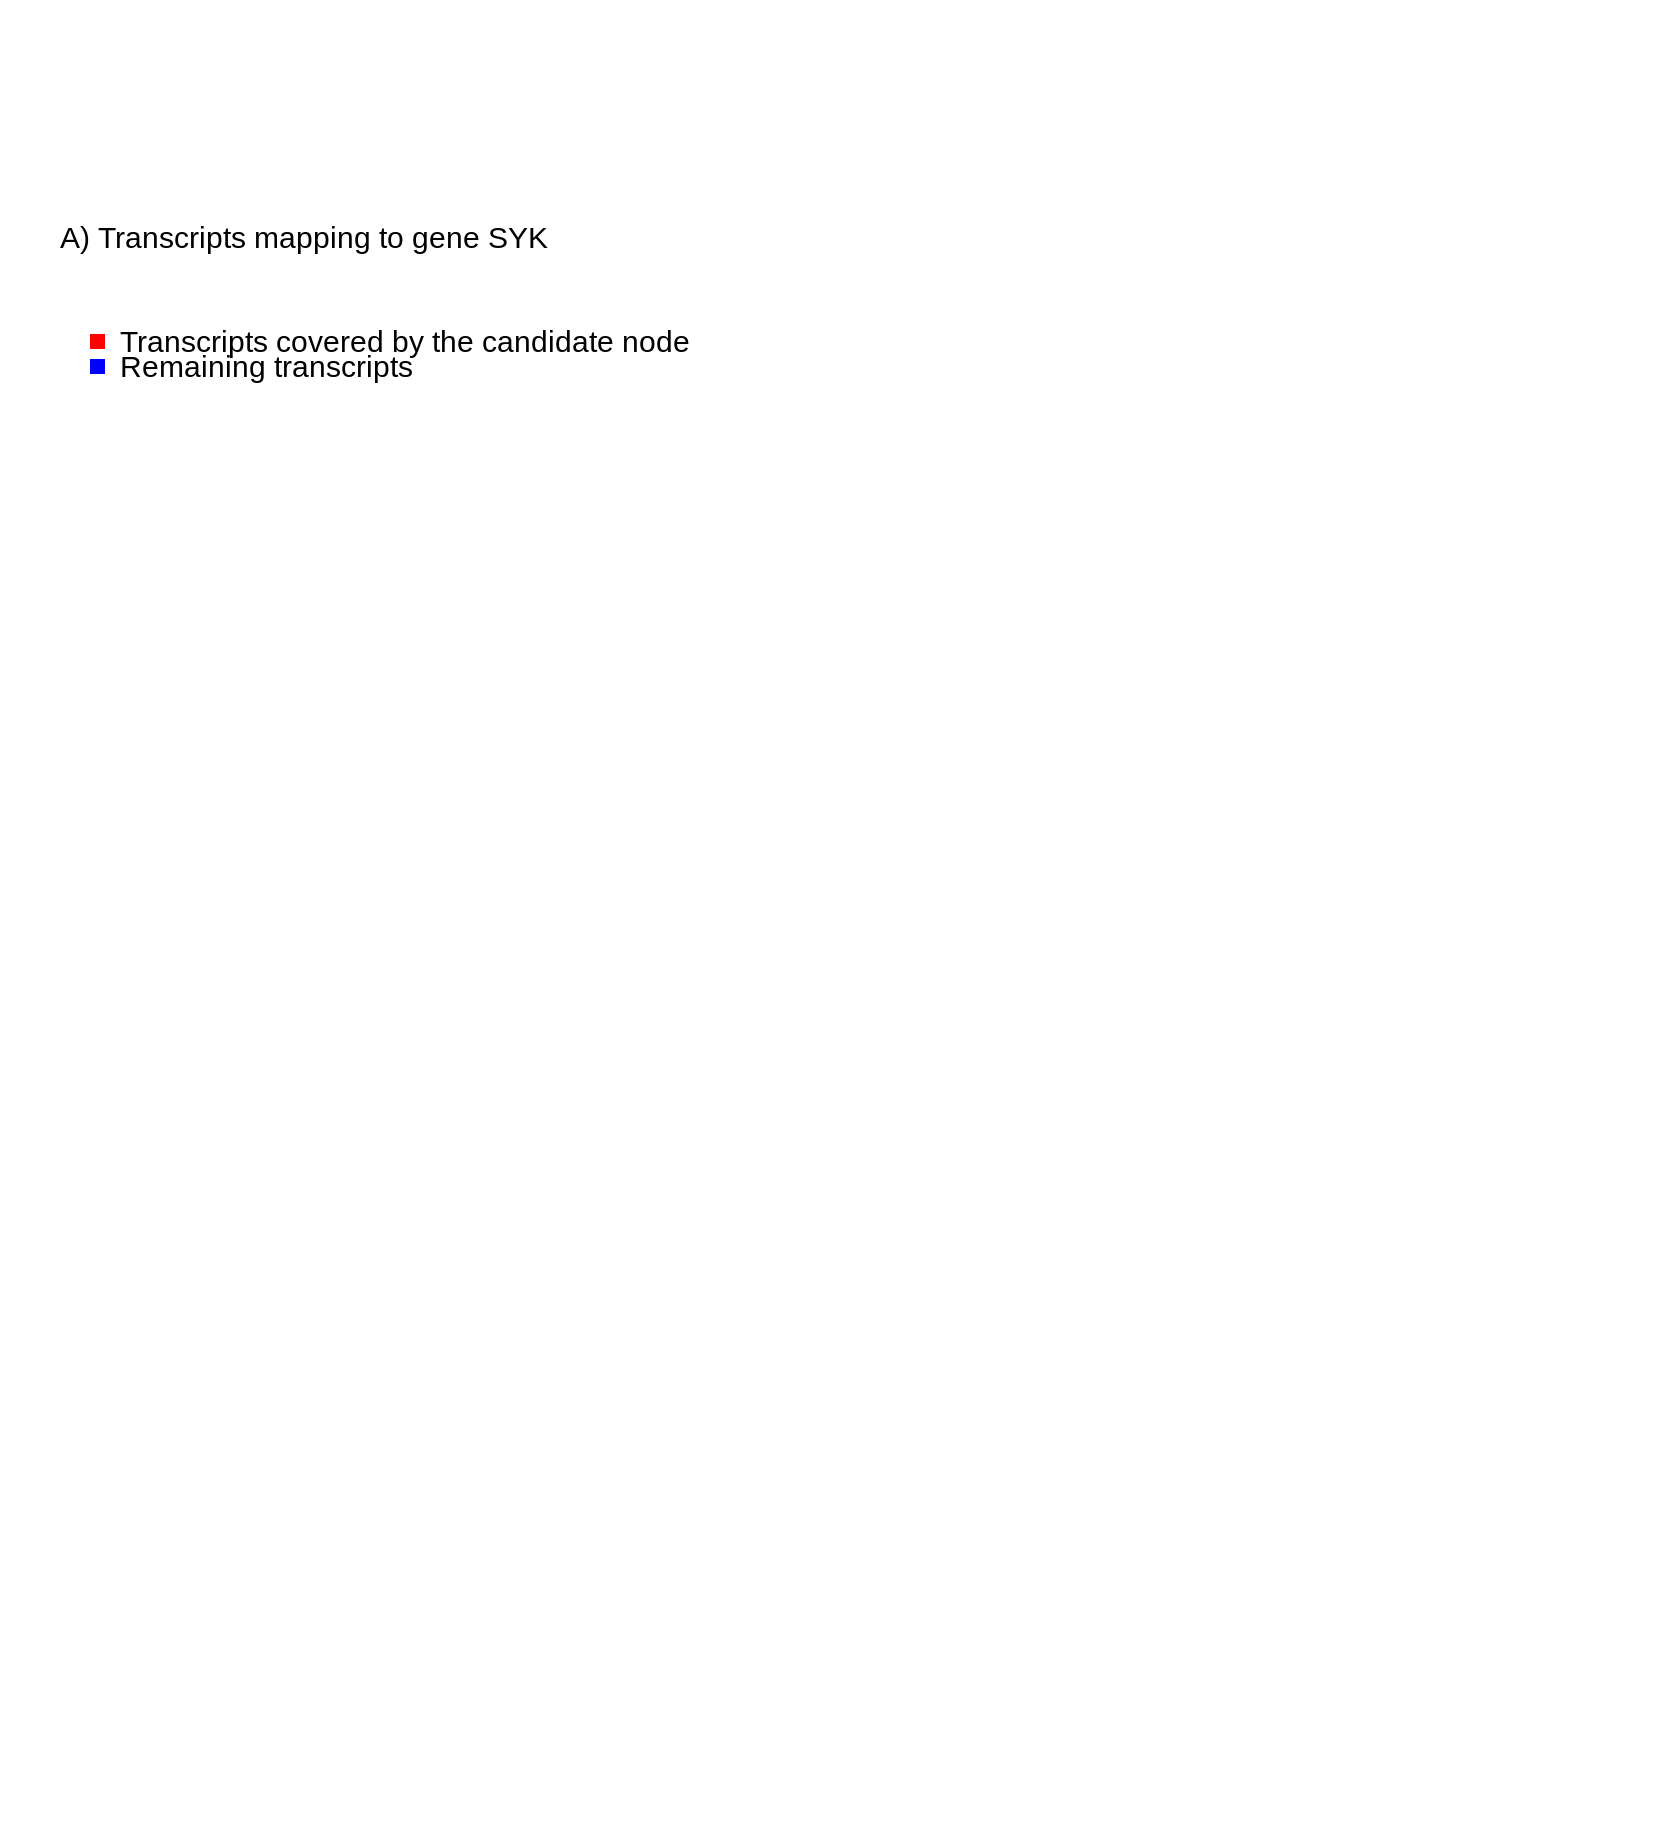

In [35]:
i <- 1
j <- 283
tt <- extPreInf(tseCons, yTxps, trenDiNodes, trenDiDegNodes, txpMouse, genesMouse, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="left")
pTree <- plotTree(tt$tSub, 9, tt$minTInd, of=45, xlim=100)
pgs <- parF(tt$g, tt$txShow, tt$tSub)

options(repr.plot.width=14, repr.plot.height=15.4)
library(plotgardener)
pageCreate(width = 14, height = 12, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = 18
)#, fontface = "bold")

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the candidate node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 1, width = 1, height = 0.5,
    just = c("left", "top"), fontsize=18,
)
plotText(label="A) Transcripts mapping to gene SYK", x = 0.5, y = 0.2,
        params = parText)

plotTranscripts(
    params = par, x = 1.5, y = 5.5, width = 5, height = 8.5, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)

plotGenomeLabel(
  params = par, x = 0.5, y = 6.2, length=6,
  just = c("left", "top"), fontsize=16
)

plotText(label="B) Tree representing the transcripts covered by gene SYK", 
         x = 7.1, y = 0.2, params = parText)
plotGG(
    plot = pTree,
    x = 6.8, y =0.5, width = 8, height=6
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSMUST00000055087.6", 
         x = 0.5, y = 7, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 7.6, width = 6, height=6
)

plotText(label="D) Scaled inferential replicates for the candidate node", 
         x = 7.1, y = 7, params = parText)

plotGG(
    plot = pI[[2]],
    x = 7.4, y = 7.6, width = 6, height=6
)

In [31]:
suppressPackageStartupMessages(source("../tree_helper.R"))

In [36]:
plotTranscripts

function (chrom, chromstart = NULL, chromend = NULL, assembly = "hg38", 
    fill = c("#669fd9", "#abcc8e"), colorbyStrand = TRUE, strandSplit = FALSE, 
    boxHeight = unit(2, "mm"), spaceWidth = 0.02, spaceHeight = 0.3, 
    limitLabel = TRUE, fontsize = 8, labels = "transcript", stroke = 0.1, 
    bg = NA, x = NULL, y = NULL, width = NULL, height = NULL, 
    just = c("left", "top"), default.units = "inches", draw = TRUE, 
    params = NULL) 
{
    errorcheck_plotTranscripts <- function(transcriptPlot, labels, 
        fill) {
        regionErrors(chromstart = transcriptPlot$chromstart, 
            chromend = transcriptPlot$chromend)
        if (!labels %in% c(NULL, "transcript", "gene", "both")) {
            stop("Invalid 'labels' input. Options are 'NULL', ", 
                "'transcript', 'gene', or 'both'.", call. = FALSE)
        }
        checkColorby(fill = fill, colorby = FALSE)
    }
    strand_scale <- function(strandSplit, height) {
        if (strandSplit == TRUE) {
            yscale <- c(-height/2, height/2)
        }
        else {
            yscale <- c(0, height)
        }
        return(yscale)
    }
    transcriptsInternal <- parseParams(params = params, defaultArgs = formals(eval(match.call()[[1]])), 
        declaredArgs = lapply(match.call()[-1], eval.parent, 
            n = 2), class = "transcriptsInternal")
    transcriptsInternal$just <- justConversion(just = transcriptsInternal$just)
    transcripts <- structure(list(chrom = transcriptsInternal$chrom, 
        chromstart = transcriptsInternal$chromstart, chromend = transcriptsInternal$chromend, 
        assembly = transcriptsInternal$assembly, x = transcriptsInternal$x, 
        y = transcriptsInternal$y, width = transcriptsInternal$width, 
        height = transcriptsInternal$height, just = transcriptsInternal$just, 
        grobs = NULL), class = "transcripts")
    attr(x = transcripts, which = "plotted") <- transcriptsInternal$draw
    if (is.null(transcripts$chrom)) {
        stop("argument \"chrom\" is missing, with no default.", 
            call. = FALSE)
    }
    check_placement(object = transcripts)
    errorcheck_plotTranscripts(transcriptPlot = transcripts, 
        labels = transcriptsInternal$labels, fill = transcriptsInternal$fill)
    transcripts$assembly <- parseAssembly(assembly = transcripts$assembly)
    transcripts <- defaultUnits(object = transcripts, default.units = transcriptsInternal$default.units)
    transcriptsInternal$boxHeight <- misc_defaultUnits(value = transcriptsInternal$boxHeight, 
        name = "boxHeight", default.units = transcriptsInternal$default.units)
    buildData <- geneData(object = transcripts, objectInternal = transcriptsInternal)
    transcripts <- buildData[[1]]
    transcriptsInternal <- buildData[[2]]
    data <- transcriptsInternal$data
    data$length <- data$TXEND - data$TXSTART
    if (transcriptsInternal$colorbyStrand == TRUE) {
        if (length(transcriptsInternal$fill) == 1) {
            posCol <- transcriptsInternal$fill
            negCol <- transcriptsInternal$fill
        }
        else {
            posCol <- transcriptsInternal$fill[1]
            negCol <- transcriptsInternal$fill[2]
        }
        pos <- data[which(data$TXSTRAND == "+"), ]
        pos$color <- rep(posCol, nrow(pos))
        neg <- data[which(data$TXSTRAND == "-"), ]
        neg$color <- rep(negCol, nrow(neg))
        data <- rbind(pos, neg)
    }
    else {
        data$color <- rep(transcriptsInternal$fill[1], nrow(data))
    }
    if (transcriptsInternal$strandSplit == TRUE) {
        posStrand <- data[which(data$TXSTRAND == "+"), ]
        minStrand <- data[which(data$TXSTRAND == "-"), ]
    }
    currentViewports <- current_viewports()
    vp_name <- paste0("transcripts", length(grep(pattern = "transcripts", 
        x = currentViewports)) + 1)
    if (is.null(transcripts$x) | is.null(transcripts$y)) {
        height <- 0.5
        yscale <- strand_scale(strandSplit = transcriptsInternal$strandSplit, 